In [112]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Read a single month sales data

In [113]:
df=pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### List all Sales data csv files

In [114]:
files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    print(file)

Sales_October_2019.csv
Sales_July_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_June_2019.csv
Sales_November_2019.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
all_data_csv.csv
Sales_March_2019.csv
Sales_September_2019.csv


### Concatenate all csv files into one Sales data file

In [115]:
files = [file for file in os.listdir('./Sales_Data')]
all_data_csv = pd.DataFrame()
for file in files:
   df=pd.read_csv('./Sales_Data/'+file)
   all_data_csv=pd.concat([all_data_csv,df])

all_data_csv = all_data_csv.to_csv('all_data_csv.csv',index=False)

### Read all data csv file to a data frame

In [116]:
sales_data = pd.read_csv('./Sales_Data/all_data_csv.csv')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


## Clean up the data!

##### Get all NaN rows in the dataframe

In [117]:
nan_df = sales_data[sales_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
282,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN


##### Drop NaN rows from the dataframe

In [118]:
sales_data=sales_data.dropna(how='all')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


#### Find 'Or' and exclude it from the dataframe

In [119]:
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


#### Convert columns to correct data types

In [120]:
sales_data['Quantity Ordered']=pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each']=pd.to_numeric(sales_data['Price Each'])
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


## Add columns to dataframe

### Add month column to dataframe

In [121]:
sales_data['Month']=sales_data['Order Date'].str[0:2]
sales_data['Month']=sales_data['Month'].astype('int32')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


### Add sales column to dataframe

In [122]:
sales_data['Sales'] = sales_data['Quantity Ordered']*sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


### Add city column to the dataframe

In [123]:
def get_city(x):
    return x.split(',')[1]

def get_state(x):
    return x.split(',')[2].split(' ')[1]
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f'{get_city(x)}, {get_state(x)}')

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,"Dallas, TX"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,"Los Angeles, CA"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,"New York City, NY"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,"New York City, NY"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,"Los Angeles, CA"


## Data Analysis

### 1. What was the best month for sales?. How much was earned that month?

In [124]:
results=sales_data.groupby('Month').sum(numeric_only=True)
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


### 2. plot the above data

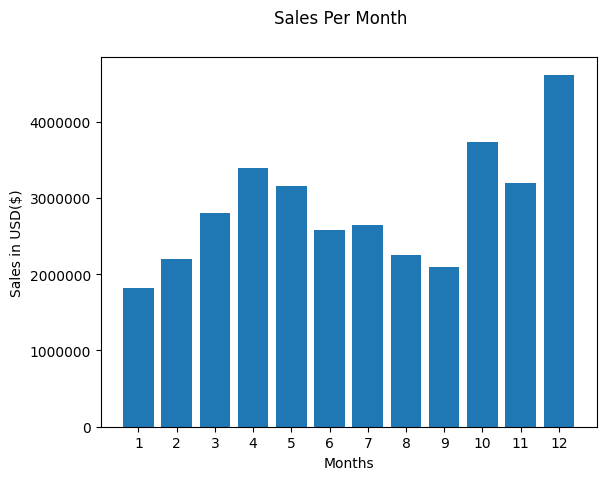

In [125]:

months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('Months')
plt.suptitle('Sales Per Month')
plt.show()

### 3.Which city had the highest number of sales?

In [126]:
results=sales_data.groupby('City').sum(numeric_only=True)
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Portland, ME",2750,447189.25,17144,449758.27
"Portland, OR",11303,1860558.22,70621,1870732.34
"San Francisco, CA",50239,8211461.74,315520,8262203.91


### 3. Plot the city sales data

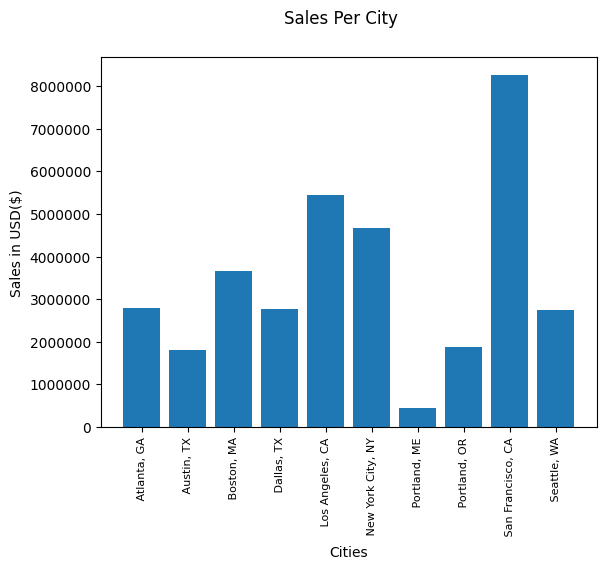

In [127]:
cities = [city for city,df in sales_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('Sales in USD($)')
plt.xlabel('Cities')
plt.suptitle('Sales Per City')
plt.show()

### 4. What time show we display adverts to maximize likelihood of customers buying the products

##### Convert order date to datetime

In [128]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,"Dallas, TX"
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,"Los Angeles, CA"
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,"New York City, NY"
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,"New York City, NY"
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,"Los Angeles, CA"


In [129]:
sales_data['Hour'] = sales_data['Order Date'].dt.hour
sales_data['Minute'] = sales_data['Order Date'].dt.minute
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,"Dallas, TX",10,56
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,"Los Angeles, CA",17,26
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,"New York City, NY",17,20
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,"New York City, NY",22,26
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,"Los Angeles, CA",16,10


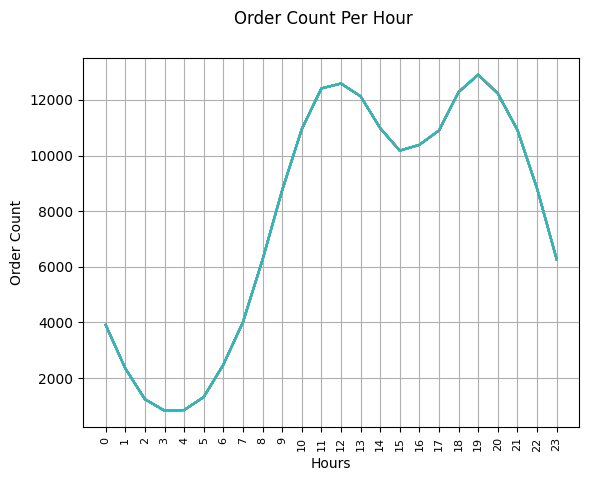

In [130]:
hours = [hour for hour,df in sales_data.groupby('Hour')]
count_grouped_by_hour = sales_data.groupby('Hour').count()

plt.plot(hours,count_grouped_by_hour)
plt.xticks(hours,rotation='vertical',size=8)
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('Order Count')
plt.xlabel('Hours')
plt.suptitle('Order Count Per Hour')
plt.grid()
plt.show()
#Best time to send out adverts is around 12pm and 7pm

### 5. What products are most often sold together

In [131]:
sales_data = sales_data[sales_data['Order ID'].duplicated(keep=False)]
sales_data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x :','.join(x))
sales_data = sales_data[['Order ID','Grouped']].drop_duplicates()
count = Counter()
for row in sales_data['Grouped']:
    grouped_list = row.split(',')
    count.update(Counter(combinations(grouped_list,2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
